# Load libraries

In [1]:
from TTreeHnBrowser import *
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import sklearn.model_selection as xval
from sklearn.datasets.mldata import fetch_mldata
import forestci as fci
import pandas as pd


Welcome to JupyROOT 6.13/03


# Read input data

In [2]:
v0sPanda = pd.read_csv('v0all.csv',sep='\t', index_col=False )

In [3]:
k0Panda=v0sPanda.query('(K0Delta<0.2 & K0Delta>-0.2) & (isBackground | cleanK0)')
variablesK0=k0Panda[['fRr', 'mpt', 'tglV0', 'pointAngleN', 'dcaNorm']].values
valuesK0=k0Panda['cleanK0'].values
variablesK0.shape
print(k0Panda.shape)
k0Panda.head(5)

(468942, 30)


,fRr,mpt,tglV0,isBackground,cleanV0,cleanK0,cleanL,cleanAL,cleanEl,K0Pull,...,pointAngle,pointAngleN,fDcaV0Daughters,dcaNorm,alphaV0S,armV0S,alphaV0,armV0,ntracks,medianM/D
2,16.743244,2.191736,0.922424,1,0,0,0,0,0,-106.798676,...,0.072856,0.506353,0.040642,0.016870,-0.452961,0.048990,-0.452822,0.048695,10010,10083
3,80.708542,0.233575,0.484057,1,0,0,0,0,0,-62.115930,...,0.008190,0.643713,0.063328,0.061668,0.352686,0.054713,0.337873,0.053507,9639,10083
5,34.579594,0.129824,-0.307052,0,1,1,0,0,0,-0.872496,...,0.046337,1.588965,1.238473,1.228166,0.462993,0.168560,0.504761,0.172139,9639,10083
11,86.942276,1.682111,-0.347026,1,0,0,0,0,0,-131.403992,...,0.007812,0.347071,0.674826,0.344843,-0.138586,0.059139,-0.150781,0.060059,12744,10083
12,79.385666,1.734038,-0.741362,1,0,0,0,0,0,-94.819017,...,0.024710,0.979956,0.127776,0.063833,0.334573,0.053737,0.323266,0.053378,12744,10083


# Random forest fit

In [4]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0, n_jobs=8)
clf.fit(variablesK0, valuesK0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [5]:
print(clf.feature_importances_)
print(variablesK0.shape)
print(clf.predict_proba(variablesK0))

[0.12788857 0.38442431 0.00775188 0.28579092 0.19414432]
(468942, 5)
[[0.98042613 0.01957387]
 [0.92977561 0.07022439]
 [0.53193725 0.46806275]
 ...
 [0.88612167 0.11387833]
 [0.99014571 0.00985429]
 [0.99110201 0.00889799]]


## Random forest error calculation

In [6]:
# Calculate the variance:
k0_training=variablesK0[0:40000]
k0_test=variablesK0[0:1000]
for i in range(0,3):
    errors = fci.random_forest_error(clf, k0_training,k0_test,memory_constrained=1, memory_limit=100, calibrate=0 )
    print(i,errors[0:1000:200])

(0, array([0.00234952, 0.00234952, 0.00234952, 0.00234952, 0.00234952]))
(1, array([0.00234952, 0.00234952, 0.00234952, 0.00234952, 0.00234952]))
(2, array([0.00234952, 0.00234952, 0.00234952, 0.00234952, 0.00234952]))


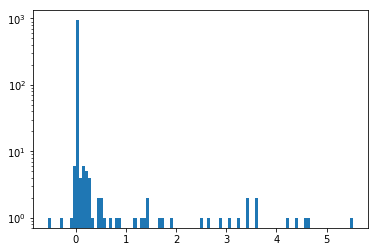

In [7]:
plt.hist(errors,log=1,bins=100)
plt.show()

In [ ]:
k0_training.shape

# TODO:
* scan of the Random foreset settings
  * include ROCS
  * export table with 2 (value+error) x 3 (settings) as csv file 
 
* prototyping Keras model compression
  *  settings (fullu connected NN)
    * deepnese scan fixing number of conections
  * export table with 2 (value+error) x 3 (settings) as csv file   

TODO: